<a href="https://colab.research.google.com/github/FilizEker/FilizEker/blob/main/penguin_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Yeni Bölüm

In [ ]:
data=pd.read_csv("/content/penguins_lter.csv")
data.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [ ]:
data.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')

In [ ]:
data.dtypes

,0
studyName,object
Sample Number,int64
Species,object
Region,object
Island,object
Stage,object
Individual ID,object
Clutch Completion,object
Date Egg,object
Culmen Length (mm),float64


In [ ]:
data.isnull().sum()

,0
studyName,0
Sample Number,0
Species,0
Region,0
Island,0
Stage,0
Individual ID,0
Clutch Completion,0
Date Egg,0
Culmen Length (mm),2


In [ ]:
data.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


In [ ]:
print("Türlerin Dagılımı")
print(data["Species"].value_counts())

print("Türlerin yüzdelik Dagılımı")
print(data["Species"].value_counts(normalize=True))

Türlerin Dagılımı
Species
Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: count, dtype: int64
Türlerin yüzdelik Dagılımı
Species
Adelie Penguin (Pygoscelis adeliae)          0.441860
Gentoo penguin (Pygoscelis papua)            0.360465
Chinstrap penguin (Pygoscelis antarctica)    0.197674
Name: proportion, dtype: float64


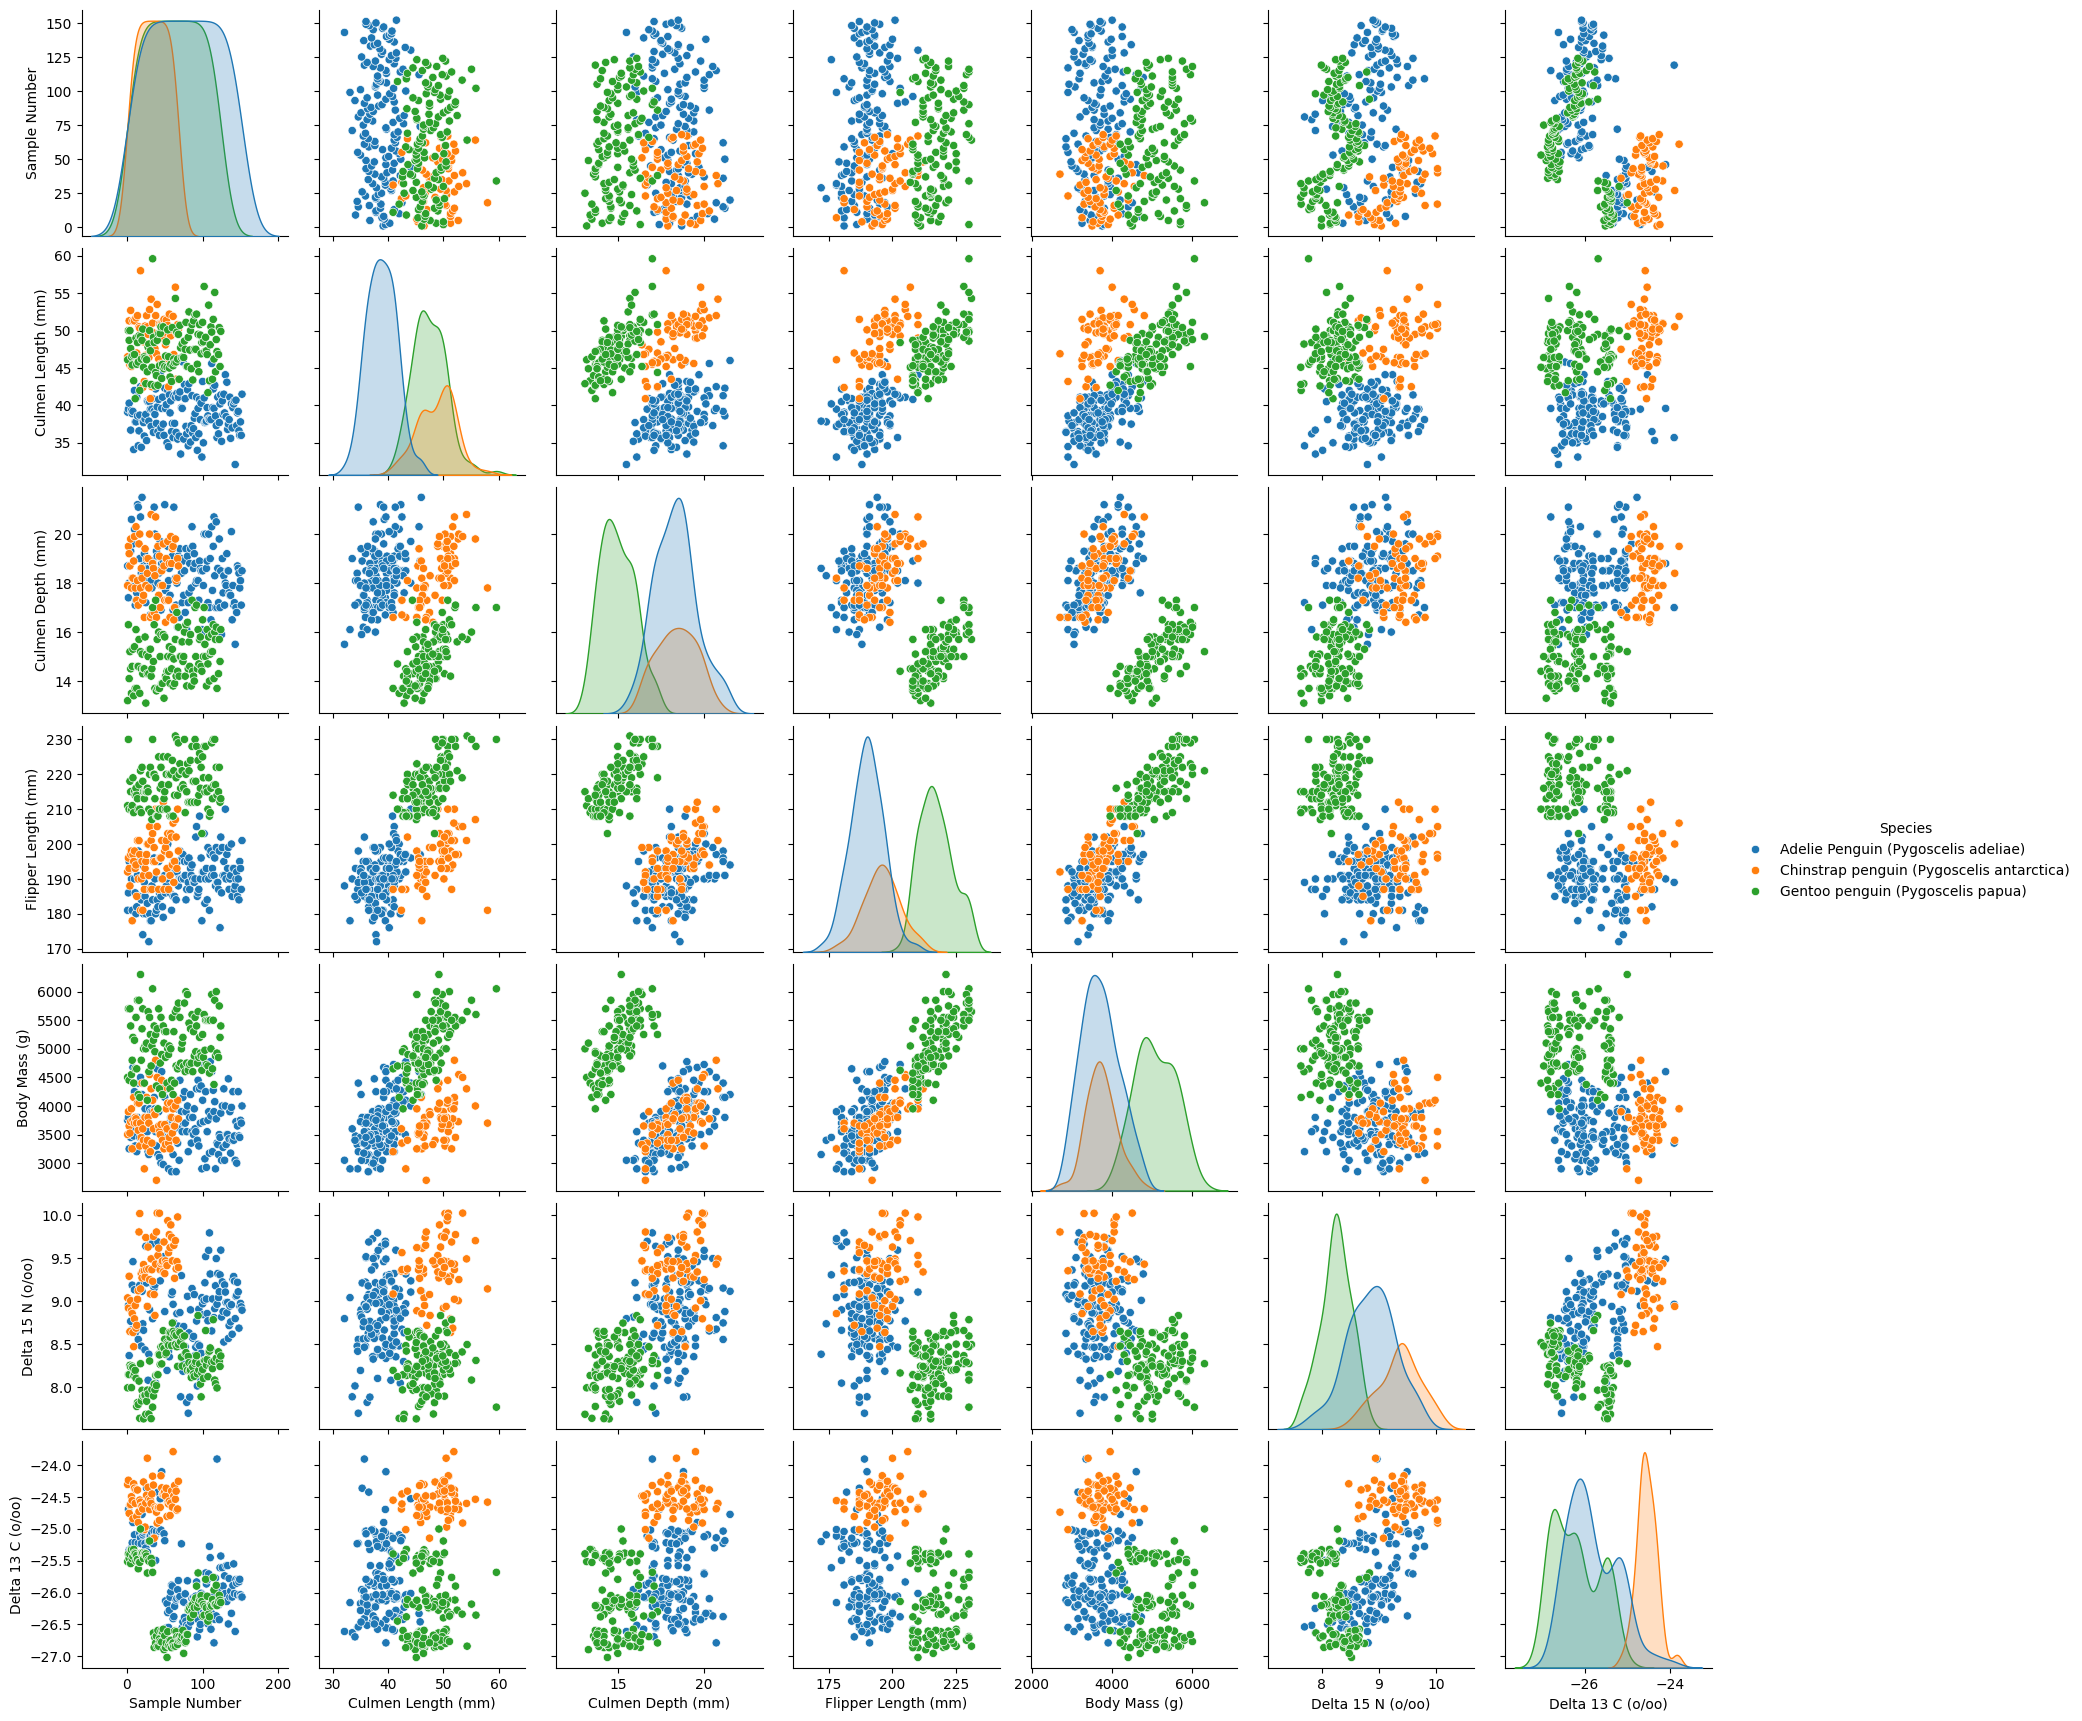

In [ ]:
sns.pairplot(data,hue="Species")

In [ ]:
data.info

<bound method DataFrame.info of     studyName  Sample Number                              Species  Region  \
0     PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1     PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2     PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3     PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4     PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   
..        ...            ...                                  ...     ...   
339   PAL0910            120    Gentoo penguin (Pygoscelis papua)  Anvers   
340   PAL0910            121    Gentoo penguin (Pygoscelis papua)  Anvers   
341   PAL0910            122    Gentoo penguin (Pygoscelis papua)  Anvers   
342   PAL0910            123    Gentoo penguin (Pygoscelis papua)  Anvers   
343   PAL0910            124    Gentoo penguin (Pygoscelis papua)  Anvers   

        Island               Stage Individual ID Clutch Completion  Date Egg  \
0    Torgersen  Adult, 1 Egg Stage          N1A1               Yes  11/11/07   
1    Torgersen  Adult, 1 Egg Stage          N1A2               Yes  11/11/07   
2    Torgersen  Adult, 1 Egg Stage          N2A1               Yes  11/16/07   
3    Torgersen  Adult, 1 Egg Stage          N2A2               Yes  11/16/07   
4    Torgersen  Adult, 1 Egg Stage          N3A1               Yes  11/16/07   
..         ...                 ...           ...               ...       ...   
339     Biscoe  Adult, 1 Egg Stage         N38A2                No   12/1/09   
340     Biscoe  Adult, 1 Egg Stage         N39A1               Yes  11/22/09   
341     Biscoe  Adult, 1 Egg Stage         N39A2               Yes  11/22/09   
342     Biscoe  Adult, 1 Egg Stage         N43A1               Yes  11/22/09   
343     Biscoe  Adult, 1 Egg Stage         N43A2               Yes  11/22/09   

     Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0                  39.1               18.7                181.0   
1                  39.5               17.4                186.0   
2                  40.3               18.0                195.0   
3                   NaN                NaN                  NaN   
4                  36.7               19.3                193.0   
..                  ...                ...                  ...   
339                 NaN                NaN                  NaN   
340                46.8               14.3                215.0   
341                50.4               15.7                222.0   
342                45.2               14.8                212.0   
343                49.9               16.1                213.0   

     Body Mass (g)     Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0           3750.0    MALE                NaN                NaN   
1           3800.0  FEMALE            8.94956          -24.69454   
2           3250.0  FEMALE            8.36821          -25.33302   
3              NaN     NaN                NaN                NaN   
4           3450.0  FEMALE            8.76651          -25.32426   
..             ...     ...                ...                ...   
339            NaN     NaN                NaN                NaN   
340         4850.0  FEMALE            8.41151          -26.13832   
341         5750.0    MALE            8.30166          -26.04117   
342         5200.0  FEMALE            8.24246          -26.11969   
343         5400.0    MALE            8.36390          -26.15531   

                           Comments  
0    Not enough blood for isotopes.  
1                               NaN  
2                               NaN  
3                Adult not sampled.  
4                               NaN  
..                              ...  
339                             NaN  
340                             NaN  
341                             NaN  
342                             NaN  
343                             NaN  

[34

In [ ]:
data.shape

(344, 17)

In [ ]:
numeric_data=data.select_dtypes(include="float64")
column_means = numeric_data.mean()
numeric_data.fillna(column_means, inplace=True)

In [ ]:
numeric_data.shape

(344, 6)

<Axes: >

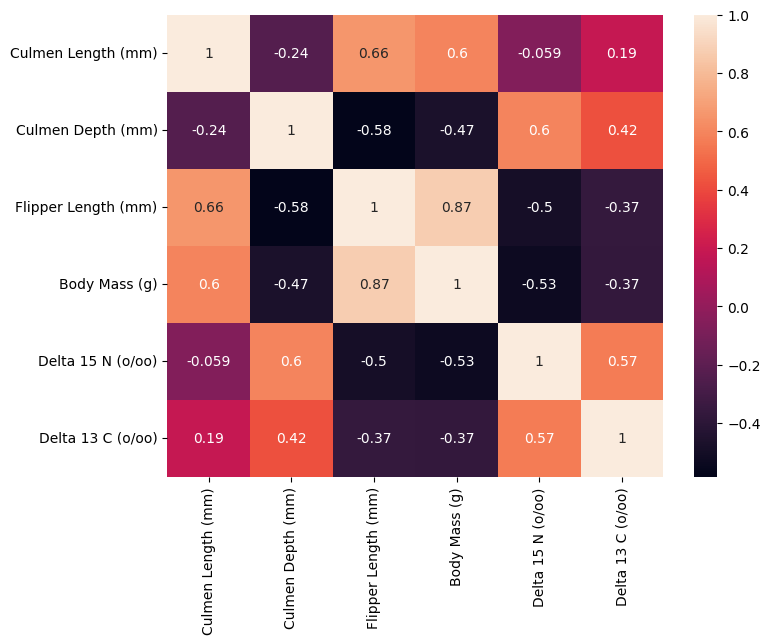

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(numeric_data.corr(),annot=True)

In [ ]:
numeric_data.isnull().sum()

,0
Culmen Length (mm),0
Culmen Depth (mm),0
Flipper Length (mm),0
Body Mass (g),0
Delta 15 N (o/oo),0
Delta 13 C (o/oo),0


In [ ]:
x=numeric_data
y=data["Species"]

In [ ]:
model=SVC(kernel="linear", random_state=42)
model.fit(x,y)

SVC(kernel='linear', random_state=42)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)
classification_report(y_test, y_pred)

'                                           precision    recall  f1-score   support\n\n      Adelie Penguin (Pygoscelis adeliae)       1.00      1.00      1.00        32\nChinstrap penguin (Pygoscelis antarctica)       1.00      1.00      1.00        16\n        Gentoo penguin (Pygoscelis papua)       1.00      1.00      1.00        21\n\n                                 accuracy                           1.00        69\n                                macro avg       1.00      1.00      1.00        69\n                             weighted avg       1.00      1.00      1.00        69\n'

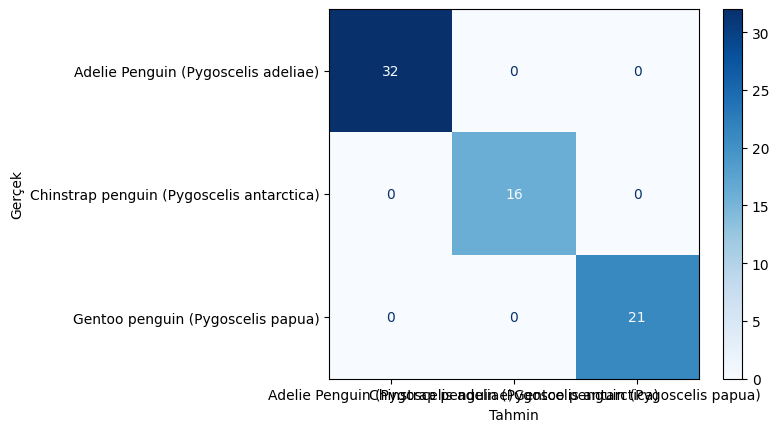

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, x_test, y_test, cmap="Blues")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.show()

# Yeni Bölüm